In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
import sys

일부분을 열어서 데이터의 구조를 확인한다

In [3]:
wine_a_part = pd.read_csv('Wine_a.csv', header = 0, nrows = 5)
wine_b_part = pd.read_csv('Wine_b.csv', header = 0, nrows = 5)

In [4]:
wine_a_part

,ID,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols
0,1,A,13.88,1.89,2.59,15.0,101,3.25
1,2,A,13.56,1.71,2.31,16.2,117,3.15
2,3,A,13.24,2.59,2.87,21.0,118,2.80
3,4,A,14.38,1.87,2.38,12.0,102,3.30
4,5,A,14.10,2.02,2.40,18.8,103,2.75


In [5]:
wine_b_part

,ID,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1,3.56,0.17,1.70,5.43,0.88,3.56,1095
1,2,3.29,0.34,2.34,6.13,0.95,3.38,795
2,3,2.69,0.39,1.82,4.32,1.04,2.93,735
3,4,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,5,2.92,0.32,2.38,6.20,NaN,2.75,1060


전체 데이터를 연다

In [6]:
wine_a = pd.read_csv('Wine_a.csv')
wine_b = pd.read_csv('Wine_b.csv')

(3-1) 전체 데이터를 ID를 기준으로 하나의 데이터 테이블을 만들고, 아이디를 삭제한 상태에서 시작한다.

In [7]:
wine_ab = pd.merge(wine_a, wine_b, left_on= 'ID', right_on = 'ID', how = 'outer')

In [8]:
wine_ab = wine_ab.drop('ID', axis = 1)

 (3-2) 전체 칼럼 value가 동일할 경우 Duplicate으로 보고 삭제한다.

In [9]:
wine_ab = wine_ab.drop_duplicates()
##wine_ab

 (3-3)각 index의 데이터 칼럼 value 중 하나만 비어 있는 경우 해당 칼럼의 평균값으로 대체하여 사용한다.
 
 (3-4)두 개 이상의 value가 비어 있다면 이는 활용할 수 없는 데이터로 간주하고 삭제한다.

In [10]:
count_of_column = (int) (len(wine_ab.columns))
wine_ab = wine_ab.dropna(thresh = count_of_column - 1, axis = 0)
##강의교안에는 thresh = 2 이면 NaN 값이 2개 이상이면 drop 이라고 되어 있는데,
##잘 되지 않아서 이리저리 해보니, NoN-NaN 값이 2개 이상이 아니면 drop 이라고 되어 있네요. 바뀐건가...
##wine_ab

In [11]:
wine_ab = wine_ab.fillna(wine_ab.mean(), axis = 0)
wine_ab

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.590000,15.000000,101.000000,3.25,3.560000,0.170000,1.70,5.430000,0.880000,3.56,1095.0
1,A,13.56,1.71,2.310000,16.200000,117.000000,3.15,3.290000,0.340000,2.34,6.130000,0.950000,3.38,795.0
2,A,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.690000,0.390000,1.82,4.320000,1.040000,2.93,735.0
3,A,14.38,1.87,2.380000,12.000000,102.000000,3.30,3.640000,0.290000,2.96,7.500000,1.200000,3.00,1547.0
4,A,14.10,2.02,2.400000,18.800000,103.000000,2.75,2.920000,0.320000,2.38,6.200000,57.765318,2.75,1060.0
5,A,12.93,3.80,2.650000,18.600000,102.000000,2.41,2.410000,0.377853,1.98,4.500000,1.030000,3.52,770.0
6,A,14.21,4.04,2.440000,18.900000,111.000000,2.85,2.650000,0.300000,1.25,5.240000,0.870000,3.33,1080.0
7,A,13.05,1.77,2.100000,17.000000,107.000000,3.00,3.000000,0.280000,2.03,5.040000,0.880000,3.35,885.0
9,A,13.05,1.65,2.550000,18.000000,98.000000,2.45,2.430000,0.290000,1.44,4.250000,1.120000,2.51,1105.0
10,A,14.22,1.70,2.300000,16.300000,118.000000,3.20,3.000000,0.260000,2.03,6.380000,0.940000,3.31,970.0


(3-5)모든 칼럼의 value에 대해서 

[평균값]이 [가장 큰 칼럼]의 [5 standard deviation 보다 큰 value]가 있다면
outlier로 간주하고 삭제한다. 

[Hint: i가 가장 평균값이 큰 칼럼이라면 모든 numerical value (절댓값)은 µi + 5 ∗ σi
보다 작아야 한다]


In [12]:
print("mean of : \n{}\n". format(wine_ab.mean(axis = 0)))
print("std of : \n{}\n". format(wine_ab.std(axis = 0)))
#아... mean 이 가장 큰 column 은 wine_ab[Proline] 이었군요.

max_mean = 0
std = 0
count = 0
for i in dict(wine_ab.mean(axis = 0)) :
    if (count == 0) :
        max_mean = dict(wine_ab.mean(axis = 0))[i]
        std = dict(wine_ab.std(axis = 0))[i]
    if (max_mean < dict(wine_ab.mean(axis = 0))[i]) :
        max_mean = dict(wine_ab.mean(axis = 0))[i]
        std = dict(wine_ab.std(axis = 0))[i]
    count += 1

mean of : 
Alcohol                  62.573240
Malic_Acid                2.341564
Ash                       2.379716
Ash_Alcalinity           19.501124
Magnesium               100.551136
Total_Phenols             2.292235
Flavanoids                2.042247
Nonflavanoid_Phenols      0.377853
Proanthocyanins           1.599553
Color_Intensity           5.125170
Hue                      57.765318
OD280_OD315               2.616292
Proline                 741.916201
dtype: float64

std of : 
Alcohol                 663.349722
Malic_Acid                1.121437
Ash                       0.303171
Ash_Alcalinity            3.334009
Magnesium                15.169370
Total_Phenols             0.632011
Flavanoids                0.992590
Nonflavanoid_Phenols      0.186158
Proanthocyanins           0.598041
Color_Intensity           2.366722
Hue                     747.252980
OD280_OD315               0.723479
Proline                 312.429765
dtype: float64



In [13]:
print('max mean      : ', max_mean)
print('std           : ', std)
print('5 * std       : ', std * 5)

drop_standard = max_mean + std * 5
print('drop_cutline  : ', drop_standard)

max mean      :  741.9162011173185
std           :  312.42976507822635
5 * std       :  1562.1488253911318
drop_cutline  :  2304.0650265084505


In [14]:
#wine_ab = wine_ab.drop('Type', axis = 1)

for header in wine_ab.columns :
    if header != 'Type' :
        print(header)
        for i, j in zip((Series(wine_ab[header]) > drop_standard), (wine_ab[header]).index) :
            if i == True :
                wine_ab = wine_ab.drop(j, axis = 0)

Alcohol
Malic_Acid
Ash
Ash_Alcalinity
Magnesium
Total_Phenols
Flavanoids
Nonflavanoid_Phenols
Proanthocyanins
Color_Intensity
Hue
OD280_OD315
Proline


최종 결과 DataFrame에는 ID를 제외한 모든 칼럼이 포함되어 있어야 한다.


이후 Exercise는 모두 최종 DataFrame을 기준으로 진행한다.

In [15]:
wine_ab

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.590000,15.000000,101.000000,3.25,3.560000,0.170000,1.70,5.430000,0.880000,3.56,1095.0
1,A,13.56,1.71,2.310000,16.200000,117.000000,3.15,3.290000,0.340000,2.34,6.130000,0.950000,3.38,795.0
2,A,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.690000,0.390000,1.82,4.320000,1.040000,2.93,735.0
3,A,14.38,1.87,2.380000,12.000000,102.000000,3.30,3.640000,0.290000,2.96,7.500000,1.200000,3.00,1547.0
4,A,14.10,2.02,2.400000,18.800000,103.000000,2.75,2.920000,0.320000,2.38,6.200000,57.765318,2.75,1060.0
5,A,12.93,3.80,2.650000,18.600000,102.000000,2.41,2.410000,0.377853,1.98,4.500000,1.030000,3.52,770.0
6,A,14.21,4.04,2.440000,18.900000,111.000000,2.85,2.650000,0.300000,1.25,5.240000,0.870000,3.33,1080.0
7,A,13.05,1.77,2.100000,17.000000,107.000000,3.00,3.000000,0.280000,2.03,5.040000,0.880000,3.35,885.0
9,A,13.05,1.65,2.550000,18.000000,98.000000,2.45,2.430000,0.290000,1.44,4.250000,1.120000,2.51,1105.0
10,A,14.22,1.70,2.300000,16.300000,118.000000,3.20,3.000000,0.260000,2.03,6.380000,0.940000,3.31,970.0


In [16]:
import sys
wine_ab.to_csv('df final.csv')

4-1.각 칼럼의 분포를 For-loop을 활용하여 다음과 같이 Visualize하라.

(4-1-1)bin은 지정하지 않는다.

(4-1-2)색은 red(opacity= 0.5)로 지정한다.

In [17]:
import matplotlib.pyplot as plt

In [18]:
figure_wine_ab = plt.figure(1, figsize = [15, 15])

<Figure size 1080x1080 with 0 Axes>

In [19]:
wine_ab.columns

Index(['Type', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

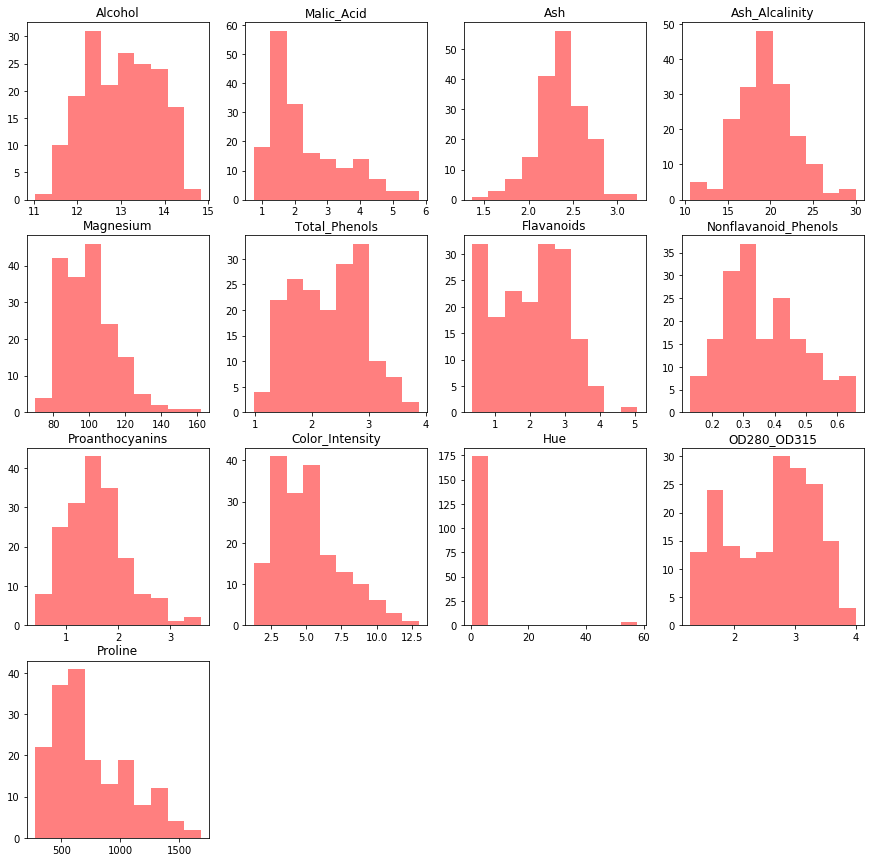

In [20]:
count = int(1)

for i in wine_ab.columns :
    if i != 'Type' :
    #   print(i)
        series_data_from_column = Series(wine_ab[i])
    #   print(wine_ab[i])
        figure_handle_ax = figure_wine_ab.add_subplot(4,4, count)
        figure_handle_ax.hist(series_data_from_column, alpha= 0.5, facecolor = 'red')
        figure_handle_ax.set_title(i)
    #   base_data_from_column.hist(figure_handle)
        count = count+1
    
figure_wine_ab

4-2.다음의 결과를 Visualize하라.

(4-2-1)하나의 캔버스에 2개의 subplot을 그려야 한다.

(4-2-2)좌측은 x축과 y축이 모두 Alcohol이다.

(4-2-3)우측은 x축을 Alcohol로 하고 y축을 여러 다른 칼럼으로 하여 plot한다

(4-2-4)그림의 크기는 달라도 무방하나 디테일은 정확히 같아야 한다.

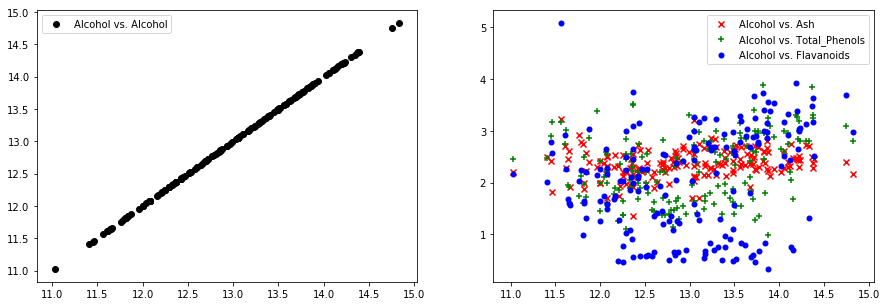

In [21]:
final_fig = plt.figure(2, figsize = [15, 5])

final_fig_ax1 = final_fig.add_subplot(1,2,1)
final_fig_ax1.scatter(wine_ab['Alcohol'], wine_ab['Alcohol'], color = 'black', label = 'Alcohol vs. Alcohol')
final_fig_ax1.legend(loc = 'best')
final_fig_ax2 = final_fig.add_subplot(1,2,2)
final_fig_ax2.scatter(wine_ab['Alcohol'], wine_ab['Ash'], color = 'red', marker = 'x', label = 'Alcohol vs. Ash')
final_fig_ax2.scatter(wine_ab['Alcohol'], wine_ab['Total_Phenols'], color = 'green', marker = '+', linewidths = 2, label = 'Alcohol vs. Total_Phenols')
final_fig_ax2.scatter(wine_ab['Alcohol'], wine_ab['Flavanoids'], color = 'blue', marker = '.', linewidths = 3, label = 'Alcohol vs. Flavanoids')
final_fig_ax2.legend(loc = 'best')

5-1.Type A, B, C의 Descriptive Statistics를 각각 구하라.


In [22]:
wine_type_A = wine_ab.loc[wine_ab['Type'] == 'A']
wine_type_B = wine_ab.loc[wine_ab['Type'] == 'B']
wine_type_C = wine_ab.loc[wine_ab['Type'] == 'C']

In [23]:
#print('Describe Statistics A \n\n{}\n\n'.format(wine_type_A.describe())) 
#print('Describe Statistics B \n\n{}\n\n'.format(wine_type_B.describe()))
#print('Describe Statistics C \n\n{}\n\n'.format(wine_type_C.describe()))

(5-2-1)Correlation matrix를 찾은 후 Heatmap을 그려라.

In [24]:
wine_ab_corr = (wine_ab.drop('Type', axis = 1)).corr()
wine_ab_corr_tmp = DataFrame(np.tril(wine_ab_corr, k = 0))
wine_ab_corr_tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.097561,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.204914,0.143107,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,-0.307531,0.287281,0.434770,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.265166,-0.057115,0.266330,-0.101117,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
5,0.287436,-0.334170,0.136470,-0.320609,0.208265,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
6,0.233783,-0.405265,0.134655,-0.346245,0.190961,0.861040,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
7,-0.151488,0.297473,0.196016,0.367871,-0.265239,-0.452958,-0.525014,1.000000,0.000000,0.000000,0.000000,0.00000,0.0
8,0.135074,-0.219841,0.014323,-0.196592,0.226450,0.612021,0.647137,-0.367326,1.000000,0.000000,0.000000,0.00000,0.0
9,0.523184,0.245122,0.242857,0.039604,0.181055,-0.055611,-0.172086,0.156650,-0.018805,1.000000,0.000000,0.00000,0.0


([<matplotlib.axis.YTick at 0x19a62125c88>,
 <a list of 13 Text yticklabel objects>)

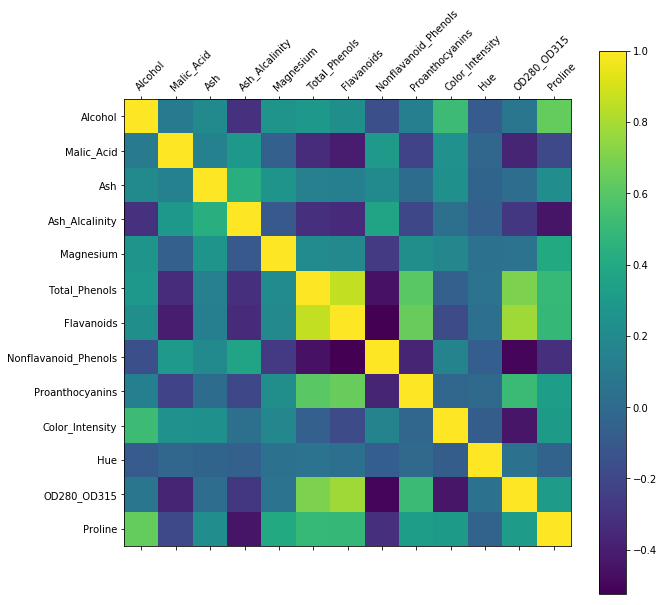

In [25]:
figure_correlation = plt.figure(3, figsize = [10,10])
figure_correlation_ax = figure_correlation.add_subplot(1,1,1)
figure_correlation_image = figure_correlation_ax.matshow(wine_ab_corr)
figure_correlation.colorbar(figure_correlation_image)
plt.xticks(range(len(wine_ab_corr.columns)), wine_ab_corr.columns)
plt.setp(figure_correlation_ax.get_xticklabels(), rotation = 45, ha = "left",
         rotation_mode = "anchor")
plt.yticks(range(len(wine_ab_corr.columns)), wine_ab_corr.columns)

(5-2-2)Diagonal(correlation= 1)을 제외하고 가장 강한 positive correlation을 보이는 두 변수를 각기 x, y축으로
하여 Exercise 4.2와 같은 포멧으로 visualize하라.

In [26]:
#print(wine_ab_corr_tmp.loc[wine_ab_corr_tmp.values == 1])
#max(wine_ab_corr_tmp.max())
max_value = 0
for i in wine_ab_corr_tmp.columns :
    for j in wine_ab_corr_tmp.index :
        if wine_ab_corr_tmp[i][j] != 1 :
            if max_value < wine_ab_corr_tmp[i][j] :
                max_value = wine_ab_corr_tmp[i][j]
                max_column = i
                max_index = j


print('value  : ', max_value)
print('index  : ', max_index)
print('column : ', max_column)

max_index_name = (wine_ab_corr.index)[int(max_index)]
max_column_name= (wine_ab_corr.columns)[int(max_column)]
print(max_index_name)
print(max_column_name)

value  :  0.8610404431977007
index  :  6
column :  5
Flavanoids
Total_Phenols


Text(0, 0.5, 'Total_Phenols\n\n')

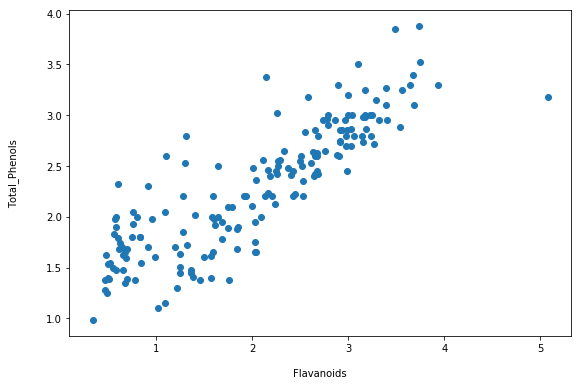

In [27]:
fig_between_two = plt.figure(4 , figsize=  [9,6])
fig_between_two_ax = fig_between_two.add_subplot(1,1,1)
fig_between_two_ax.scatter(wine_ab[max_index_name], wine_ab[max_column_name])
plt.xlabel('\n' + max_index_name)
plt.ylabel(max_column_name + '\n\n' )

(5-2-3)결과를 Exercise 4.2의 우측 결과와 비교 분석하라.

확실히 별로 상관관계가 보이지 않았던 4-2의 우측 결과에 비하여 
Positive Correlation 이 보인다.

(5-3-1)Type 을 제외한 전체 데이터에 대하여 

Principal Component 10개를 사용하여 PCA를 실시하라.

In [28]:
describe_wine_ab = wine_ab.drop('Type' , axis = 1).describe()
dropped_wine_ab = wine_ab.drop('Type', axis = 1)
describe_wine_ab

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.996384,2.339774,2.365532,19.509046,99.975443,2.293390,2.03329,0.363592,1.589661,5.084551,1.917412,2.608849,743.655367
std,0.812157,1.119377,0.272010,3.337771,14.241585,0.627203,0.99435,0.124210,0.573744,2.306891,7.357529,0.711477,312.815313
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.34000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.22000,0.270000,1.250000,3.250000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.13000,0.340000,1.550000,4.800000,0.970000,2.780000,672.000000
75%,13.670000,3.100000,2.550000,21.500000,107.000000,2.800000,2.88000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.08000,0.660000,3.580000,13.000000,57.765318,4.000000,1680.000000


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
# Data Preperation (exclude all categorical data)
df_wine_num = dropped_wine_ab

# Normalization
scaler = StandardScaler()
scaler.fit(df_wine_num)
df_wine_num_scaled = scaler.transform(df_wine_num)

# Let's apply pca into calories and rating
wine_pca_num = PCA(n_components = len(describe_wine_ab.columns))
wine_pca_num_res = wine_pca_num.fit(df_wine_num_scaled)


# Important Results of PCA
PCA_result = ['Variance', 'Variance\%','Cum\%']
wine_pca_num_res_pc = np.transpose(np.array(wine_pca_num_res.components_).reshape(np.shape(wine_pca_num_res.components_)))
wine_pca_num_res_var = np.array(np.transpose(wine_pca_num_res.explained_variance_[:,np.newaxis]))
wine_pca_num_res_varp = np.array(np.transpose(wine_pca_num_res.explained_variance_ratio_[:,np.newaxis]))
wine_pca_num_res_sum = np.cumsum(np.round(wine_pca_num_res.explained_variance_ratio_, decimals=8)*100)
wine_pca_num_res_varc = np.array(np.transpose(wine_pca_num_res_sum[:,np.newaxis]))

# Make DataFrame Table for Final Result
wine_pca_num_res_tab = DataFrame(np.concatenate((wine_pca_num_res_pc,
                                                wine_pca_num_res_var,
                                                wine_pca_num_res_varp,
                                                wine_pca_num_res_varc),
                                                axis = 0),
                                    index = np.concatenate((np.array(df_wine_num.columns), PCA_result)),
                                    columns = describe_wine_ab.columns)

wine_pca_num_res_tab

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
Alcohol,0.186987,0.480975,-0.226431,-0.089366,-0.221632,-0.052572,-0.218232,-0.118675,-0.347828,-0.580979,-0.242359,-0.208431,0.012102
Malic_Acid,-0.225262,0.246975,0.079672,0.034282,-0.372307,0.708712,-0.377795,0.210600,0.139914,0.149743,0.089183,0.007833,0.052515
Ash,0.019588,0.350901,0.609590,0.051253,0.034327,-0.279105,-0.212563,-0.034218,0.072127,0.315941,-0.499053,-0.010427,-0.150474
Ash_Alcalinity,-0.251990,0.045074,0.605020,-0.004008,0.060821,0.085206,0.104257,-0.386033,-0.308110,-0.243779,0.471690,-0.102028,0.101459
Magnesium,0.168854,0.289552,0.066624,0.378501,0.694763,0.207624,-0.012714,0.324210,0.129887,-0.275578,0.073252,0.091570,0.048006
Total_Phenols,0.416562,-0.002299,0.169481,-0.046926,-0.207432,-0.016481,0.071238,0.007303,0.515264,-0.184521,0.291386,-0.361918,-0.481333
Flavanoids,0.435235,-0.069073,0.183386,-0.069453,-0.135161,-0.028014,-0.001985,-0.008591,0.242936,-0.007154,-0.023000,-0.091461,0.824773
Nonflavanoid_Phenols,-0.317636,0.118801,0.164319,-0.141874,-0.257642,-0.368330,0.206983,0.709160,0.021288,-0.236290,0.133859,0.090428,0.087678
Proanthocyanins,0.333071,-0.025175,0.173257,-0.062169,-0.095721,0.402036,0.609409,0.220770,-0.410276,0.125886,-0.249869,-0.066447,-0.112293
Color_Intensity,-0.045080,0.541260,-0.142547,-0.022735,-0.135215,0.004914,0.470664,-0.336946,0.314271,0.050031,0.069078,0.472666,0.036737


결과를 df pca result.csv로 저장하여 코드와 함께 제출하라.

PCA 결과에 대한 해석을 Jupyter Notebook의 markdown cell에 서술하라.

In [31]:
import sys
wine_pca_num_res_tab.to_csv('df pca result.csv')

<< 우리는 최대한 적은 데이터로 충분한 설명력을 확보하기 위해 차원을 줄여 나갔다.

그래서 위 표가 의미하는 바는 다음과 같다.

"상관관계가 높은 데이터를 중심으로 선을 그었고,
그 선 하나로 설명할 수 있는 데이터의 양이 높은 순서대로 정렬을 했다."

그런데 모든 데이터를 하나의 선으로 설명하자면, 33%의 데이터를 제외한 나머지 데이터에 대하여 설명력을 잃어버리고 만다.

서로의 축들에 수직인 축들을 하나씩 붙여 나가서 설명력과 차원을 늘려나가 본다.

8개의 축으로 (8개의 축은 모두 서로가 서로에게 수직이다, 즉 인간이 시각적으로 인지하기는 어렵지만, 8차원의 좌표공간에 데이터가 뿌려져있는 것이다.) 데이터를 90%이상 설명할 수 있으므로, 데이터 설명력 10%를 포기하고 차원 4~5개를 줄일 수 있는 셈이다. >>



In [32]:
# Principal Scores from PCA of calories and rating (PS1 and PS2 only)
wine_pca_num_res_ps = wine_pca_num.fit_transform(df_wine_num_scaled)
wine_pca_num_res_ps_tab = DataFrame(data = wine_pca_num_res_ps,
index = dropped_wine_ab.index)
wine_pca_num_res_ps_tab

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.388317,0.551393,-0.189792,-0.271160,-0.369754,-0.303232,-1.004546,-0.612433,0.578940,0.286467,-0.486462,0.064636,-0.109744
1,2.763361,0.341677,-0.060450,-0.065975,0.131089,0.319847,0.704470,0.640173,0.542909,-0.804747,-0.280577,0.364982,0.021442
2,1.008985,0.923776,1.945141,0.277376,0.499884,0.002979,-0.461375,0.553241,0.358206,-0.286889,-0.532102,-0.188872,-0.118299
3,4.355742,1.781302,-1.270834,-0.560559,-1.026071,0.001584,0.920473,0.750336,-0.346730,0.850223,-0.301913,-0.300589,-0.039617
4,2.234114,0.402920,-0.171967,6.609981,-3.395959,-0.923606,1.128344,-0.282350,-1.324119,-0.286368,-0.046992,-0.348305,0.293404
5,0.755373,0.253920,1.124424,-0.147308,-0.630725,0.873499,-0.791589,0.773628,0.022599,0.396232,-0.490179,0.754546,-0.179875
6,1.448631,1.509370,0.004256,0.015007,-0.518277,0.781324,-1.833659,0.124502,0.226189,-0.501747,0.582578,0.129431,0.014506
7,2.283090,-0.580361,-0.537556,-0.180548,0.093719,0.389182,0.317818,0.167525,0.322478,-0.316535,0.448967,0.249241,0.006534
9,0.969672,0.217428,-0.103765,-0.080853,0.315865,-0.843508,-0.550869,-0.231519,-0.107423,0.888274,-0.008976,-0.498743,0.011037
10,2.990460,0.975875,-0.602196,0.021800,0.253105,0.201217,0.076672,0.016904,0.286059,-0.937133,-0.065492,0.119554,-0.210801


Text(0, 0.5, 'Principal Score 2')

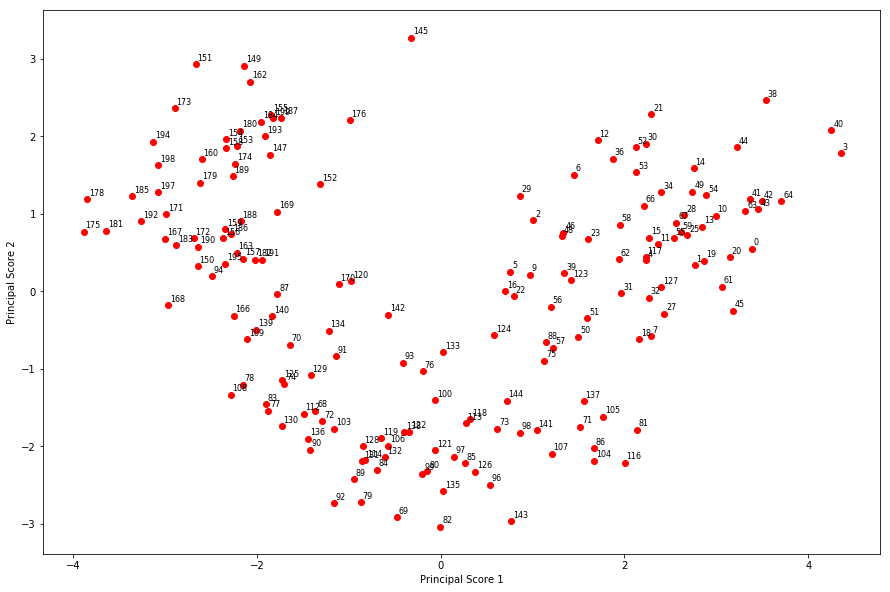

In [33]:
# Plot PS1 vs. PS2
fig_dist = plt.figure(figsize=[15,10])
label = np.array(dropped_wine_ab.index)
x_coords = np.array(wine_pca_num_res_ps_tab.iloc[:,0])
y_coords = np.array(wine_pca_num_res_ps_tab.iloc[:,1])
for i,type in enumerate(label):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x + 0.02, y + 0.05, type, fontsize=8)
plt.xlabel('Principal Score 1')
plt.ylabel('Principal Score 2')

+반성문

pandas 와 numpy 메소드에 아직 서툴러서 for문을 너무 많이 사용했고

코드의 의미를 모른 채 PCA분석을 했습니다

아직 완전히 무엇을 하는지 감을 잡으려고 PC로부터 나온 PS를 이해하다가 PS 그래프까지 만들어 버렸습니다...
